In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

### Ordinary Least Square Assumption

In [3]:
data = pd.read_csv("../data/vehicle_clean.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


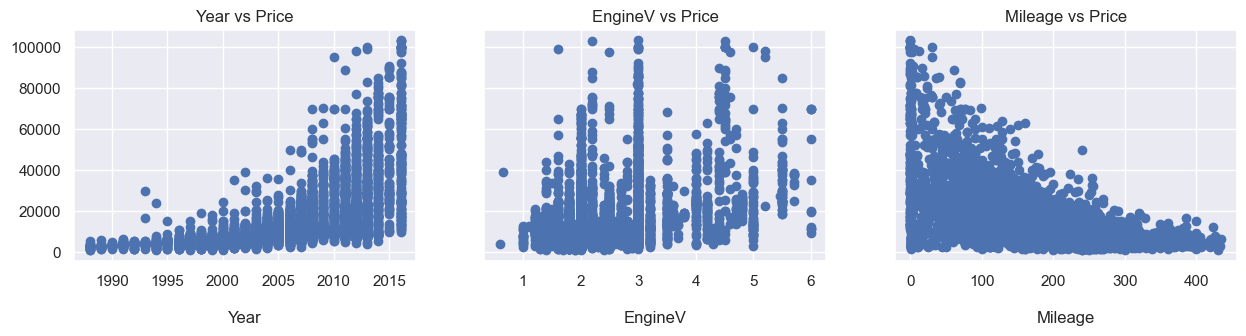

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data['Year'], data['Price'])
ax1.set_title('Year vs Price')
ax1.set_xlabel('\nYear')

ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('EngineV vs Price')
ax2.set_xlabel('\nEngineV')


ax3.scatter(data['Mileage'], data['Price'])
ax3.set_title('Mileage vs Price')
ax3.set_xlabel('\nMileage')

plt.show()

### Log Transformation (Price)

In [5]:
price_log = np.log(data['Price'])
data['Log Price'] = price_log
data['Log Price'].describe()

count    3810.000000
mean        9.386504
std         0.847686
min         6.684612
25%         8.875566
50%         9.350102
75%         9.947504
max        11.545712
Name: Log Price, dtype: float64

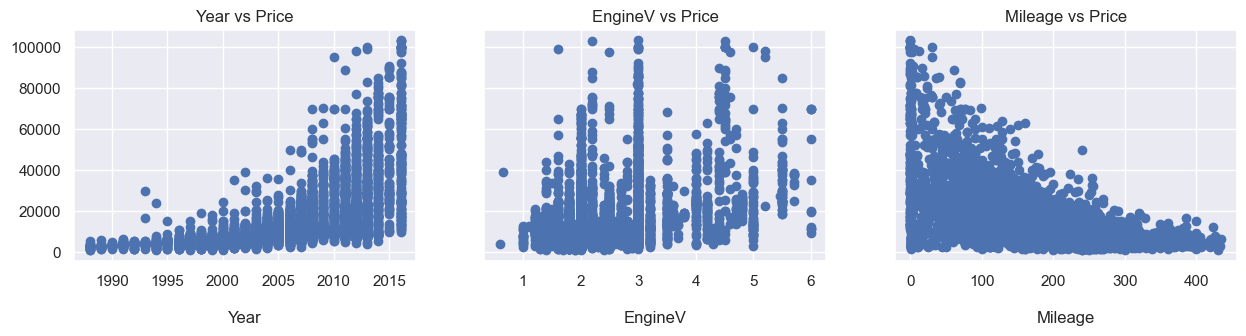

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data['Year'], data['Price'])
ax1.set_title('Year vs Price')
ax1.set_xlabel('\nYear')

ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('EngineV vs Price')
ax2.set_xlabel('\nEngineV')


ax3.scatter(data['Mileage'], data['Price'])
ax3.set_title('Mileage vs Price')
ax3.set_xlabel('\nMileage')

plt.show()

In [7]:
data = data.drop(['Price'], axis=1)
data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


### Multicollinearity

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
variables = data[['Mileage', 'Year', 'EngineV']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,3.911191,Mileage
1,10.554767,Year
2,8.011428,EngineV


In [10]:
data = data.drop(['Year'], axis=1)
data.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


### Dummification

In [11]:
data = pd.get_dummies(data, drop_first=True)

In [12]:
data.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [13]:
cols = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']

data = data[cols]

In [14]:
data.to_csv("../data/vehicle_clean_final.csv", index=False)